In [1]:
import numpy as np
from tqdm.notebook import tqdm
import requests

from energy import energy_gradient, energy_function_forward, gradient_magnitude_sobel_operator
from seams import seams_map_dp, seam_map_function_forward, carve_column_mask
from seam_carve import SeamCarve, get_importance_map_from_borders

from PIL import Image
from matplotlib import pyplot as plt
import os

In [2]:
url = 'https://static.boredpanda.com/blog/wp-content/uploads/2016/03/hairy-fluffy-cat-sky-the-ragdoll-31.jpg'
img = Image.open(requests.get(url, stream=True).raw)
img.save(os.path.join('images/cat.jpg'))

In [3]:
img_path = 'images/cat.jpg'

print('Original size:', np.array(img).shape)

new_size = (650, 710)
print('New size:', new_size)

Original size: (700, 700, 3)
New size: (650, 710)


In [4]:
upper = 0.04
bottom = 1
left = 0.23
right = 0.78

importance_map = get_importance_map_from_borders(img, upper, bottom, left, right)
importance_map_img = Image.fromarray(np.uint8(importance_map), 'L')

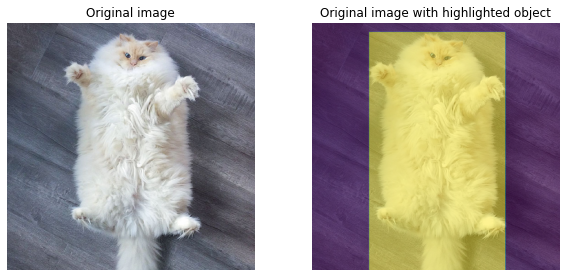

In [5]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(img)
plt.axis(False)
plt.title('Original image')

plt.subplot(222)
plt.imshow(img)
plt.axis(False)
plt.imshow(importance_map_img, alpha=.5)
plt.axis(False)
plt.title('Original image with highlighted object')

plt.show()

## Energy gradient

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


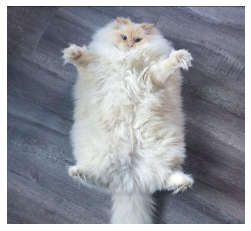

In [6]:
sc_dual_grad = SeamCarve(image_path=img_path,
                new_size=new_size,
                energy_function=energy_gradient,
                seam_map_function=seams_map_dp,
                carve_function=carve_column_mask,
                importance_map = None,
                name_suffix='dual_grad')

sc_dual_grad.run()

sc_dual_grad.save_result()

plt.imshow(sc_dual_grad.final_image)
plt.axis(False)
plt.show()

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


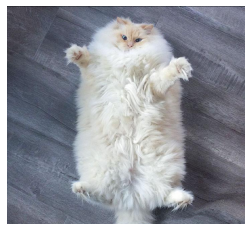

In [7]:
sc_dual_grad = SeamCarve(image_path=img_path,
                new_size=new_size,
                energy_function=energy_gradient,
                seam_map_function=seams_map_dp,
                carve_function=carve_column_mask,
                importance_map = importance_map,
                name_suffix='dual_grad_with_object')

sc_dual_grad.run()

sc_dual_grad.save_result()

plt.imshow(sc_dual_grad.final_image)
plt.axis(False)
plt.show()

In [8]:
# sc_dual_grad.__dict__

In [9]:
np.sum(sc_dual_grad.time_by_step)

100.74844000000007

## Sobel

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


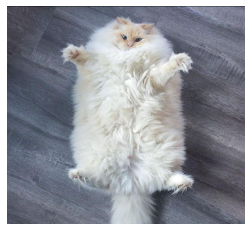

In [10]:
sc_sobel = SeamCarve(image_path=img_path,
                new_size=new_size,
                energy_function=gradient_magnitude_sobel_operator,
                seam_map_function=seams_map_dp,
                carve_function=carve_column_mask,
                importance_map = None,
                name_suffix='sobel')

sc_sobel.run()

sc_sobel.save_result()

plt.imshow(sc_sobel.final_image)
plt.axis(False)
plt.show()

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


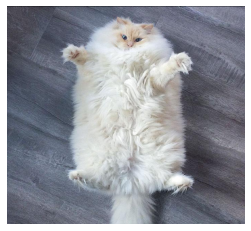

In [11]:
sc_sobel = SeamCarve(image_path=img_path,
                new_size=new_size,
                energy_function=gradient_magnitude_sobel_operator,
                seam_map_function=seams_map_dp,
                carve_function=carve_column_mask,
                importance_map = importance_map,
                name_suffix='sobel_with_object')

sc_sobel.run()

sc_sobel.save_result()

plt.imshow(sc_sobel.final_image)
plt.axis(False)
plt.show()

## Forward energy

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


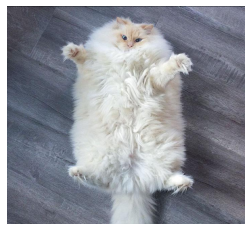

In [12]:
sc_forward = SeamCarve(image_path=img_path,
                new_size=new_size,
                energy_function=energy_function_forward,
                seam_map_function=seam_map_function_forward,
                carve_function=carve_column_mask,
                importance_map = None,
                name_suffix='forward')

sc_forward.run()

sc_forward.save_result()

plt.imshow(sc_forward.final_image)
plt.axis(False)
plt.show()

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


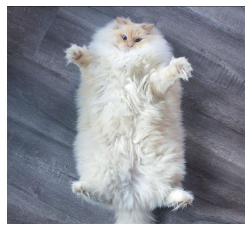

In [13]:
sc_forward = SeamCarve(image_path=img_path,
                new_size=new_size,
                energy_function=energy_function_forward,
                seam_map_function=seam_map_function_forward,
                carve_function=carve_column_mask,
                importance_map = importance_map,
                name_suffix='forward_with_object')

sc_forward.run()

sc_forward.save_result()

plt.imshow(sc_forward.final_image)
plt.axis(False)
plt.show()